# 📊 ANN Regression Model for PCF-SPR Sensor Data

This notebook demonstrates how to use an **Artificial Neural Network (ANN)** to predict **confinement loss** and **sensitivity** of a photonic crystal fiber-based sensor from given parameters.

We will:
1. Load the dataset (`Collected_Data.csv`)
2. Preprocess and split the data
3. Build and train an ANN
4. Evaluate its performance
5. Compare predicted vs true values



In [11]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


---
## Step 2: Load Dataset
The dataset comes from COMSOL simulations. It contains:
- `w` = wavelength (µm)
- `na` = analyte refractive index
- `rg(um)` = radius of gold nanowire
- `imag(neff)` = imaginary part of effective refractive index
- Output:
  - `loss` = confinement loss


In [12]:
# 📌 Step 2: Load dataset
data = pd.read_csv("Collected_Data.csv")   # keep file in the same folder

# Clean column names
data.columns = data.columns.str.strip()

# Quick preview
print(data.head())


      w    na                                       neff  re(neff)  \
0  0.60  1.31   1.4519323887669042-3.291653714847547E-6i  1.451932   
1  0.62  1.31     1.45091066181998-3.408409361911753E-6i  1.450911   
2  0.64  1.31   1.4499279284661912-4.654727785503613E-6i  1.449928   
3  0.66  1.31   1.4489779158457035-8.768782197488685E-6i  1.448978   
4  0.68  1.31  1.4480534509365457-2.0683030246449427E-5i  1.448053   

   imag(neff)       loss  SA(1/RIU)  rg(um)  
0    0.000003   3.056809   4.515266     0.3  
1    0.000003   3.063131 -12.868908     0.3  
2    0.000005   4.052470  19.683089     0.3  
3    0.000009   7.402882  36.599197     0.3  
4    0.000021  16.947698  48.733377     0.3  


---
## Step 3: Define Inputs and Outputs
- **Inputs (X):** `w`, `na`, `rg(um)`, `imag(neff)`
- **Outputs (y):** `loss`, `SA(1/RIU)`
---


In [14]:
# Step 3: Inputs and output (only 'loss')
X = data[['w', 'na', 'rg(um)', 'imag(neff)']].values
y = data[['loss']].values   # only loss column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale inputs and output using RobustScaler (handles outliers better)
scaler_X = RobustScaler()
scaler_y = RobustScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


---
## Step 4: Build ANN
We create a **feed-forward neural network**:
- 3 hidden layers × 50 neurons each
- Activation: **ReLU**
- Optimizer: **Adam**
- Loss: **Mean Squared Error (MSE)**
- Output: 2 neurons → predict `loss` and `sensitivity`
---


In [15]:
# Step 4: Build ANN model (only 1 output neuron)
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(1)  # only predicting loss
])

opt = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=opt, loss='mse')


c:\Users\dskum\Python\deeplearning\langchain\venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Step 5: Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_split=0.2, verbose=1)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.4872 - val_loss: 8.5761
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5116 - val_loss: 3.4943
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4018 - val_loss: 0.9517
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7964 - val_loss: 0.5336
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6300 - val_loss: 0.4750
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5684 - val_loss: 0.4522
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5543 - val_loss: 0.4261
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5245 - val_loss: 0.4346
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5076 - val_loss: 0.3959
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4830 - val_loss: 0.4161
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4820 - val_loss: 0.3940
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [17]:
# Step 6: Evaluate and predict
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MSE):", test_loss)

y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)  # back to original scale
y_test_rescaled = scaler_y.inverse_transform(y_test)


Test Loss (MSE): 0.1543312817811966
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


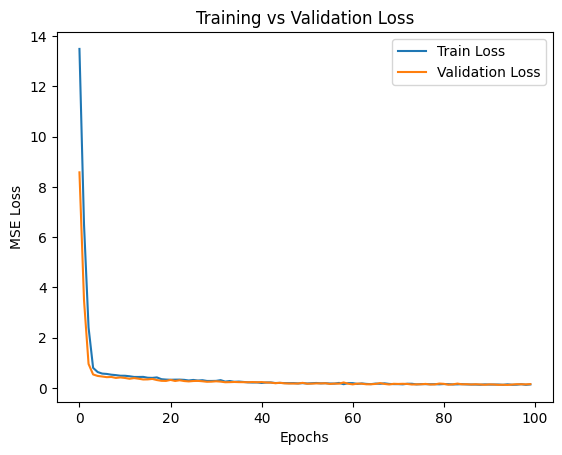

In [18]:
# Step 7: Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


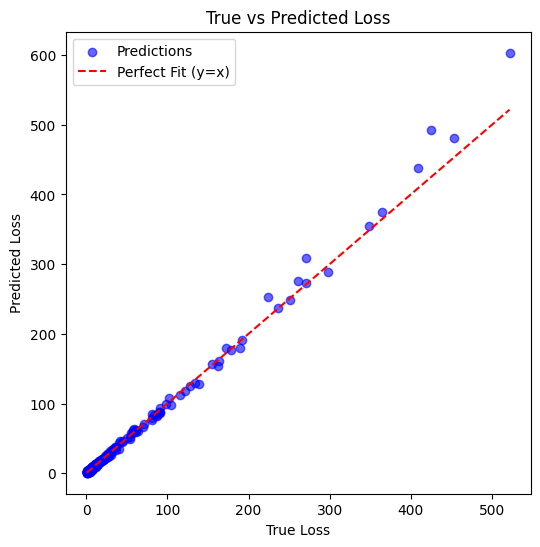

In [20]:
# Step 8: Compare predictions vs true values (with colors)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_rescaled, y_pred_rescaled, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()],
         [y_test_rescaled.min(), y_test_rescaled.max()],
         color='red', linestyle='--', label='Perfect Fit (y=x)')
plt.xlabel("True Loss")
plt.ylabel("Predicted Loss")
plt.title("True vs Predicted Loss")
plt.legend()
plt.show()
